In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
#statistical data visualization library built on top of Matplotlib for the creation of aesthetically pleasing and informative plots
# in this project it visualizes traffic volume patterns to gain insights
from sklearn.model_selection import train_test_split
#train_test_split function divides the dataset into training and testing sets
from sklearn.linear_model import LinearRegression
#Linear Regression models the relationship between independent variables ( features) and dependent variable (target) using a linear equation 
from sklearn.metrics import mean_absolute_error
# mean_absolute_error is used for evaluating regression models and calculates the average absolute difference between actual and predicted values
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
file_path = r"C:\Users\Sanskar Mishra\Desktop\traffic\Metro_Interstate_Traffic_Volume.csv"
data = pd.read_csv(file_path)
#loading the dataset

In [6]:
print ("First 5 rows of the dataset:")
print(data.head()) #displays the first few rows of the dataset

First 5 rows of the dataseet:
   traffic_volume holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0            5545     NaN  288.28      0.0      0.0          40       Clouds   
1            4516     NaN  289.36      0.0      0.0          75       Clouds   
2            4767     NaN  289.58      0.0      0.0          90       Clouds   
3            5026     NaN  290.13      0.0      0.0          90       Clouds   
4            4918     NaN  291.14      0.0      0.0          75       Clouds   

  weather_description         date_time  
0    scattered clouds  02-10-2012 09:00  
1       broken clouds  02-10-2012 10:00  
2     overcast clouds  02-10-2012 11:00  
3     overcast clouds  02-10-2012 12:00  
4       broken clouds  02-10-2012 13:00  


In [7]:
print("\nDataset Information:")
print(data.info())
# This method provides a summary of the dataset loaded into the Pandas Dataframe, it includes details about the dataset as no of rows columns, column names and data types


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       48204 non-null  int64  
 1   holiday              61 non-null     object 
 2   temp                 48204 non-null  float64
 3   rain_1h              48204 non-null  float64
 4   snow_1h              48204 non-null  float64
 5   clouds_all           48204 non-null  int64  
 6   weather_main         48204 non-null  object 
 7   weather_description  48204 non-null  object 
 8   date_time            48204 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB
None


In [9]:
print("\nChecking for missing values:")
print(data.isnull().sum())
#performs a check for missing values in each column of the data frame and provides a count of missing values per column


Checking for missing values:
traffic_volume             0
holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
dtype: int64


In [29]:
print("\nHandling missing values using forward fill:")
data.bfill(inplace=True)
#it fills missing values in the data frame by propagating the last valid value forward along the column
#ffill for forward fill bfill for backward fill and inplace=True ensures that changes are applied directly to the data frame without needing to assign the result to a new variable


Handling missing values using forward fill:


In [30]:
#feature extraction
data['date_time'] = pd.to_datetime(data['date_time'], format='%d-%m-%Y %H:%M', errors='coerce')
#converts the values in the date_time column of the Dataframe from text/string format to a DateTime object

In [31]:
data['hour'] = data['date_time'].dt.hour
#data['hour'] creates a new column hour in the DataFrame that holds the extracted hour values for each row
#.dt accessor allows you to extract specific components from datetime object, .hour extracts the hour from the date_time column 
data['day_of_week'] = data['date_time'].dt.dayofweek
#.dt.dayofweek returns the day of the week as integer where Monday is 0 tue is 1 and Sunday is 6
data['month'] = data['date_time'].dt.month
#.month extracts the month from the date_time column as an integer from 1 (January) to 12(december)
data['is_weekend'] = data['day_of_week'].apply(lambda x: 1 if x >=5 else 0)
# .apply() is a method in pandas that allows you to apply a function to the element of a column or DataFrame, the lambda function checks if value in dayofweek column is 5( Saturday) or greater
# It creates a binary column is_weekend where 1 represents weekends and 0 represents weekdays


In [32]:
print("\nUpdated dataset with extracted features:")
print(data.head())
#Displayes the updated dataset with new features


Updated dataset with extracted features:
   traffic_volume       holiday    temp  rain_1h  snow_1h  clouds_all  \
0            5545  Columbus Day  288.28      0.0      0.0          40   
1            4516  Columbus Day  289.36      0.0      0.0          75   
2            4767  Columbus Day  289.58      0.0      0.0          90   
3            5026  Columbus Day  290.13      0.0      0.0          90   
4            4918  Columbus Day  291.14      0.0      0.0          75   

  weather_main weather_description           date_time  hour  day_of_week  \
0       Clouds    scattered clouds 2012-10-02 09:00:00     9            1   
1       Clouds       broken clouds 2012-10-02 10:00:00    10            1   
2       Clouds     overcast clouds 2012-10-02 11:00:00    11            1   
3       Clouds     overcast clouds 2012-10-02 12:00:00    12            1   
4       Clouds       broken clouds 2012-10-02 13:00:00    13            1   

   month  is_weekend  
0     10           0  
1     10  

In [33]:
X= data[['hour', 'day_of_week','month','is_weekend']]
Y= data['traffic_volume']
# x represents the features (input variables) and y represents the target (output variables)
# y is the target dataset which is the output variable or label you want to predict
# x provides the model with context while y is the outcome you are trying to predict the traffic volume at that particular time

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=42)
print(f"\nTraining data size: {X_train.shape}")
print(f"Testing data size: {X_test.shape}")


Training data size: (38563, 4)
Testing data size: (9641, 4)


In [53]:
model = LinearRegression()
model.fit(X_train, Y_train)
y_pred_linear = model.predict(X_test)
print("\nModel Training complete.")


Model Training complete.


In [36]:
Y_pred= model.predict(X_test)

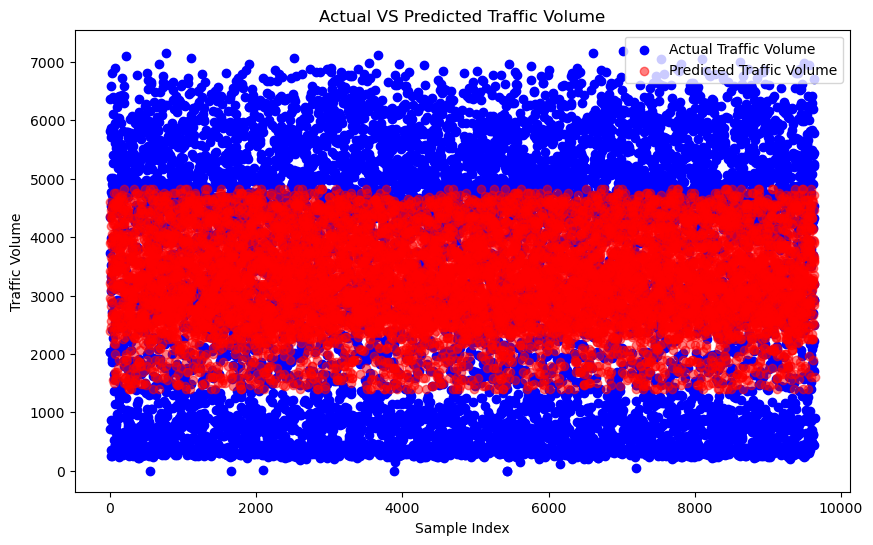

In [38]:
plt.figure(figsize=(10,6))
plt.scatter(range(len(Y_test)), Y_test, color='blue', label= 'Actual Traffic Volume')
plt.scatter(range(len(Y_pred)), Y_pred, color='red', label='Predicted Traffic Volume', alpha=0.5)
plt.title("Actual VS Predicted Traffic Volume")
plt.xlabel("Sample Index")
plt.ylabel("Traffic Volume")
plt.legend()
plt.show()

In [54]:
print("\nLinear Regression Model Performance:")
print(f"R² Score: {r2_score(Y_test, y_pred_linear):.4f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(Y_test, y_pred_linear):.4f}")
print(f"Root Mean Squared Error (RMSE): {mean_squared_error(Y_test, y_pred_linear, squared=False):.4f}")


Linear Regression Model Performance:
R² Score: 0.1758
Mean Absolute Error (MAE): 1598.1709
Root Mean Squared Error (RMSE): 1805.1457


In [42]:
print("\nTraining Decision Tree Regressor...")
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train, Y_train)
y_pred_tree = tree_model.predict(X_test)


Training Decision Tree Regressor...


In [46]:
print("\nDecision Tree Regressor Performance:")
print(f"R² Score: {r2_score(Y_test, y_pred_tree):.4f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(Y_test, y_pred_tree):.4f}")
print(f"Root Mean Squared Error (RMSE): {mean_squared_error(Y_test, y_pred_tree, squared=False):.4f}")


Decision Tree Regressor Performance:
R² Score: 0.9079
Mean Absolute Error (MAE): 389.9572
Root Mean Squared Error (RMSE): 603.2744


In [47]:
print("\nFeature Importance from Decision Tree:")
feature_importances = tree_model.feature_importances_
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")


Feature Importance from Decision Tree:
hour: 0.8896
day_of_week: 0.1074
month: 0.0020
is_weekend: 0.0010


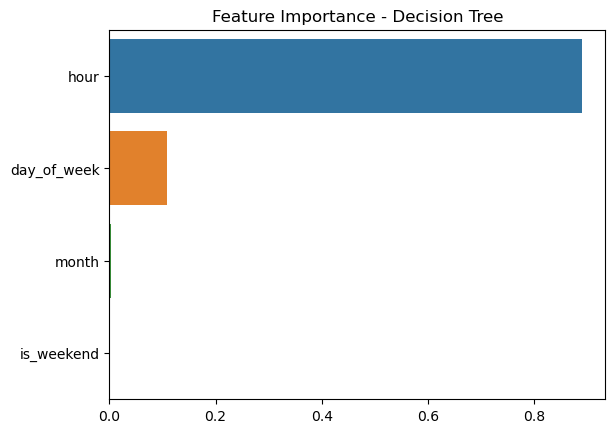

In [48]:
sns.barplot(x=feature_importances, y=X.columns)
plt.title("Feature Importance - Decision Tree")
plt.show()


Training Random Forest Regressor...

Random Forest Regressor Performance:
R² Score: 0.9097
Mean Absolute Error (MAE): 385.3753
Root Mean Squared Error (RMSE): 597.4594


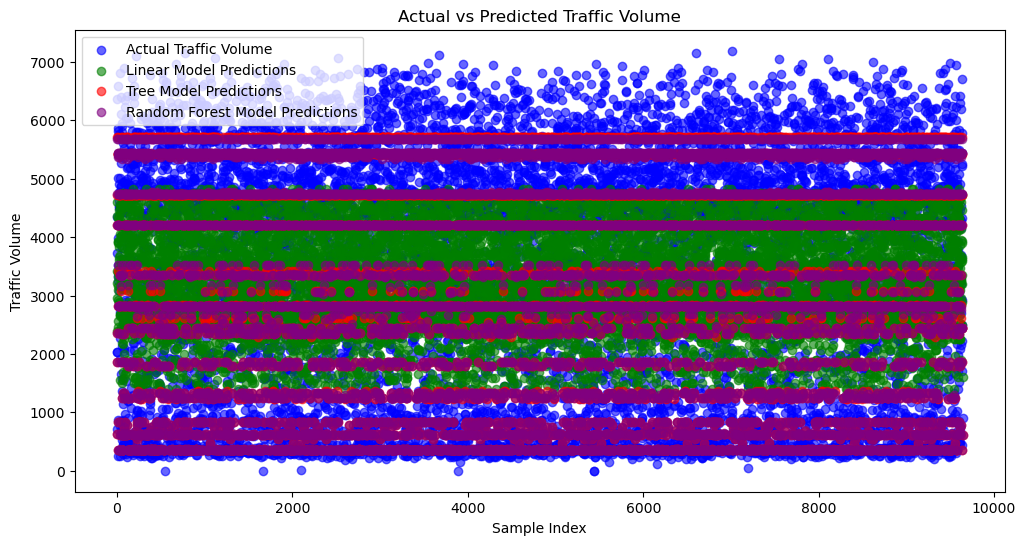


Feature Importance from Random Forest:
hour: 0.8894
day_of_week: 0.0614
month: 0.0019
is_weekend: 0.0472


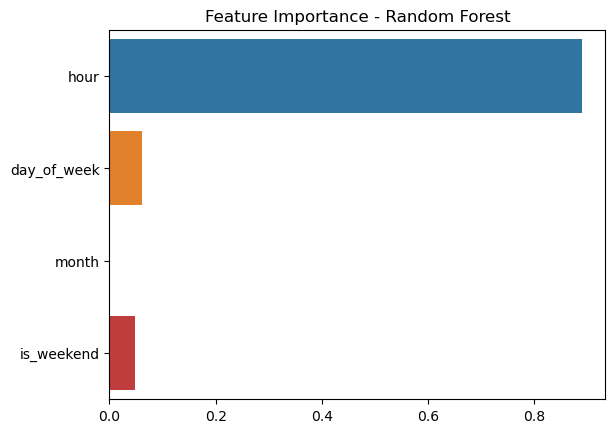

In [55]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor
print("\nTraining Random Forest Regressor...")
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, Y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest Regressor
print("\nRandom Forest Regressor Performance:")
print(f"R² Score: {r2_score(Y_test, y_pred_rf):.4f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(Y_test, y_pred_rf):.4f}")
print(f"Root Mean Squared Error (RMSE): {mean_squared_error(Y_test, y_pred_rf, squared=False):.4f}")

# Visualization: Actual vs Predicted Traffic Volume (Including Random Forest)
plt.figure(figsize=(12, 6))
plt.scatter(range(len(Y_test)), Y_test, color='blue', label='Actual Traffic Volume', alpha=0.6)
plt.scatter(range(len(y_pred_linear)), y_pred_linear, color='green', label='Linear Model Predictions', alpha=0.6)
plt.scatter(range(len(y_pred_tree)), y_pred_tree, color='red', label='Tree Model Predictions', alpha=0.6)
plt.scatter(range(len(y_pred_rf)), y_pred_rf, color='purple', label='Random Forest Model Predictions', alpha=0.6)
plt.title("Actual vs Predicted Traffic Volume")
plt.xlabel("Sample Index")
plt.ylabel("Traffic Volume")
plt.legend()
plt.show()

# Feature Importance for Random Forest
print("\nFeature Importance from Random Forest:")
feature_importances_rf = rf_model.feature_importances_
for feature, importance in zip(X.columns, feature_importances_rf):
    print(f"{feature}: {importance:.4f}")

# Bar Plot for Feature Importance (Random Forest)
sns.barplot(x=feature_importances_rf, y=X.columns)
plt.title("Feature Importance - Random Forest")
plt.show()



Training Neural Network Regressor...

Neural Network Regressor Performance:
R² Score: 0.8973
Mean Absolute Error (MAE): 435.7628
Root Mean Squared Error (RMSE): 637.2364


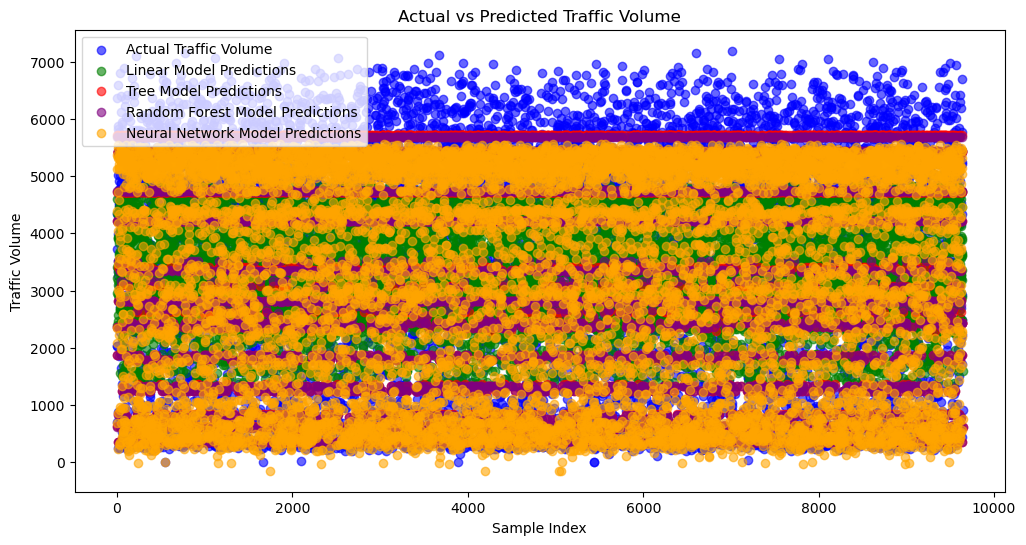


Neural Network: No direct feature importance available.


In [57]:
# Importing MLPRegressor for Neural Network
from sklearn.neural_network import MLPRegressor

# Neural Network Regressor (MLP)
print("\nTraining Neural Network Regressor...")
nn_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42)
nn_model.fit(X_train, Y_train)
y_pred_nn = nn_model.predict(X_test)

# Evaluate Neural Network Regressor
print("\nNeural Network Regressor Performance:")
print(f"R² Score: {r2_score(Y_test, y_pred_nn):.4f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(Y_test, y_pred_nn):.4f}")
print(f"Root Mean Squared Error (RMSE): {mean_squared_error(Y_test, y_pred_nn, squared=False):.4f}")

# Visualization: Actual vs Predicted Traffic Volume (Including Neural Network)
plt.figure(figsize=(12, 6))
plt.scatter(range(len(Y_test)), Y_test, color='blue', label='Actual Traffic Volume', alpha=0.6)
plt.scatter(range(len(y_pred_linear)), y_pred_linear, color='green', label='Linear Model Predictions', alpha=0.6)
plt.scatter(range(len(y_pred_tree)), y_pred_tree, color='red', label='Tree Model Predictions', alpha=0.6)
plt.scatter(range(len(y_pred_rf)), y_pred_rf, color='purple', label='Random Forest Model Predictions', alpha=0.6)
plt.scatter(range(len(y_pred_nn)), y_pred_nn, color='orange', label='Neural Network Model Predictions', alpha=0.6)
plt.title("Actual vs Predicted Traffic Volume")
plt.xlabel("Sample Index")
plt.ylabel("Traffic Volume")
plt.legend()
plt.show()

# Feature Importance for Neural Network
# Neural networks don't provide direct feature importance, but you can visualize performance metrics
print("\nNeural Network: No direct feature importance available.")


In [58]:
# Create a summary table for model evaluation
model_comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest", "Neural Network"],
    "R² Score": [
        r2_score(Y_test, y_pred_linear),
        r2_score(Y_test, y_pred_tree),
        r2_score(Y_test, y_pred_rf),
        r2_score(Y_test, y_pred_nn),
    ],
    "Mean Absolute Error (MAE)": [
        mean_absolute_error(Y_test, y_pred_linear),
        mean_absolute_error(Y_test, y_pred_tree),
        mean_absolute_error(Y_test, y_pred_rf),
        mean_absolute_error(Y_test, y_pred_nn),
    ],
    "Root Mean Squared Error (RMSE)": [
        mean_squared_error(Y_test, y_pred_linear, squared=False),
        mean_squared_error(Y_test, y_pred_tree, squared=False),
        mean_squared_error(Y_test, y_pred_rf, squared=False),
        mean_squared_error(Y_test, y_pred_nn, squared=False),
    ],
})

# Display the summary table
print("\nModel Comparison Summary:")
print(model_comparison)



Model Comparison Summary:
               Model  R² Score  Mean Absolute Error (MAE)  \
0  Linear Regression  0.175784                1598.170926   
1      Decision Tree  0.907945                 389.957178   
2      Random Forest  0.909711                 385.375332   
3     Neural Network  0.897289                 435.762839   

   Root Mean Squared Error (RMSE)  
0                     1805.145715  
1                      603.274352  
2                      597.459413  
3                      637.236395  
